<a href="https://colab.research.google.com/github/altiparmakzeynep/sentiment-analysis-nlp/blob/main/NLP_Project_Cleared_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 


In [3]:
df = pd.read_csv("Tweets.csv")

In [6]:
def preprocess_data(data):
  #Remove hyperlinks
  data = data.astype(str).str.replace('https?:\/\/.*[\r\n]*', '')

  #Removes Tags
  data = data.astype(str).str.replace('@\w+', '')

  #Removes Hashtags
  data = data.astype(str).str.replace('#\w+', '')

  #Remove Numbers
  data = data.astype(str).str.replace('\d+', '')

  #Remove the old style retweet text "RT"
  data = data.astype(str).str.replace('^RT[\s]+', '')

  #Convert all strings to lower
  lower_text = data.str.lower()

  #Lemmatization
  lemmatizer = nltk.stem.WordNetLemmatizer()

  #Tokenization
  w_tokenizer =  TweetTokenizer()
 
  def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]
    
  def remove_punctuation(words):
    new_words = []
    
    for word in words:
      new_word = re.sub(r'[^\w\s]', '', (word))
      if new_word != '':
        new_words.append(new_word)
    return new_words
    
  words = lower_text.apply(lemmatize_text)
  words = words.apply(remove_punctuation)
  return words

In [31]:
pre_tweets = preprocess_data(df['text'])
df['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
df["text"].head()
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


In [32]:
df['text'] = [' '.join(map(str, l)) for l in df['text']]

In [33]:
df['text']

0                                                     said
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637             please bring american airline blackberry
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [48]:
df2 =df[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df2["text"]
y= df2["airline_sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
X_train_count = vectorizer.fit_transform(X_train)
# encode document
X_test_count = vectorizer.transform(X_test)
# summarize encoded vector

In [52]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,_exact_,aa,aaadvantage,aaalwayslate,aadavantage,aadelay,aadv,aadvantage,aafail,aal,...,zabsonre,zccu,zero,zfv,zigzagging,zipper,zone,zrh,zurich,zurichnew
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11708,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11709,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11710,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score

In [54]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

In [55]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [56]:
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

Test_Set
              precision    recall  f1-score   support

    negative       0.68      0.99      0.81      1835
     neutral       0.76      0.17      0.28       620
    positive       0.89      0.22      0.35       473

    accuracy                           0.69      2928
   macro avg       0.78      0.46      0.48      2928
weighted avg       0.73      0.69      0.62      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.72      1.00      0.84      7343
     neutral       0.90      0.30      0.45      2479
    positive       0.94      0.37      0.53      1890

    accuracy                           0.75     11712
   macro avg       0.86      0.55      0.60     11712
weighted avg       0.79      0.75      0.70     11712



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


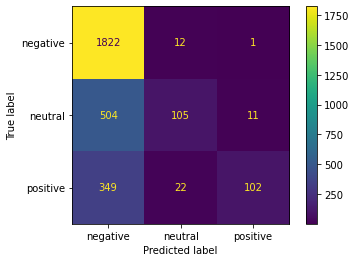

In [58]:
eval(nb, X_train_count, X_test_count) 

In [59]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 0.02, max_iter=1000) # class_weight default olarak None dır. Bizim datamız imbalanced olmasına rağmen
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

Test_Set
              precision    recall  f1-score   support

    negative       0.64      1.00      0.78      1835
     neutral       0.76      0.02      0.04       620
    positive       0.88      0.10      0.19       473

    accuracy                           0.65      2928
   macro avg       0.76      0.37      0.34      2928
weighted avg       0.71      0.65      0.53      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.64      1.00      0.78      7343
     neutral       0.78      0.02      0.04      2479
    positive       0.88      0.11      0.19      1890

    accuracy                           0.65     11712
   macro avg       0.77      0.38      0.34     11712
weighted avg       0.71      0.65      0.53     11712



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


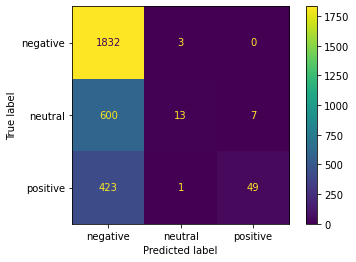

In [60]:
eval(log, X_train_count, X_test_count)

In [62]:
from sklearn.svm import LinearSVC

svc = LinearSVC()  
svc.fit(X_train_count,y_train)

LinearSVC()

Test_Set
              precision    recall  f1-score   support

    negative       0.83      0.90      0.87      1835
     neutral       0.61      0.50      0.55       620
    positive       0.75      0.69      0.72       473

    accuracy                           0.78      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.77      0.78      0.78      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.95      0.98      0.96      7343
     neutral       0.92      0.84      0.88      2479
    positive       0.94      0.92      0.93      1890

    accuracy                           0.94     11712
   macro avg       0.94      0.91      0.92     11712
weighted avg       0.94      0.94      0.94     11712



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


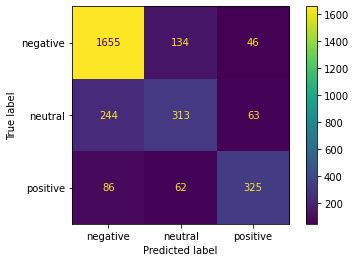

In [63]:
eval(svc, X_train_count, X_test_count)